# Part II - Analyzing Bike-Share Usage Patterns: Insights from the Ford GoBike System
## Tinh Bui Duong

## Investigation Overview


The goal of this presentation is to explore and communicate key insights from the Ford GoBike System dataset. By leveraging data visualization techniques, we aim to uncover patterns in bike usage, identify factors influencing trip behavior, and make recommendations for improving the bike-share system's service and operations.


## Dataset Overview and Executive Summary
The dataset used for this analysis comes from the Ford GoBike System, a bike-sharing service in the San Francisco Bay Area. It contains information on over 183,000 bike trips, with 16 columns of data, including trip duration, start and end stations, bike and user details, and time-related variables. This dataset allows us to explore patterns in bike usage, user demographics, trip behaviors, and station performance.

The dataset includes the following key columns:

- Trip Duration (duration_sec): The length of each bike trip in seconds.
- Start and End Stations (start_station_name, end_station_name): The locations where bike trips begin and end.
- User Details (user_type, member_birth_year, member_gender): Information about the bike-share users, including their type (member or non-member) and demographics.
- Time-related Variables (start_time, end_time): The start and end times of each trip, useful for analyzing trends over time.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('201902-fordgobike-tripdata.csv')

## Visualization 1: Trip Duration Distribution

- Purpose: This histogram visualizes the distribution of trip durations in the Ford GoBike dataset. The overlaid Kernel Density Estimate (KDE) curve gives a smooth representation of the distribution.
- Observation: Most trips are relatively short, with a peak around 10–15 minutes. There are a few outliers where trip durations exceed the average, indicating longer or less typical bike rides. Understanding the distribution of trip durations helps identify areas where the system might need improvements, such as ensuring the availability of bikes for frequent short trips while managing bikes for longer journeys.

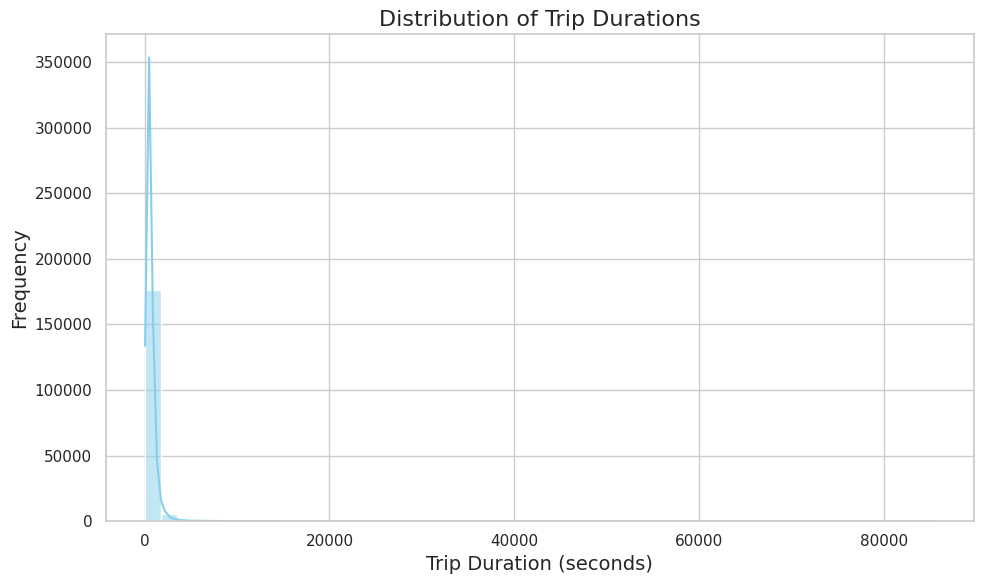

In [3]:
# Convert the 'duration_sec' column to a numeric type (if needed)
data['duration_sec'] = pd.to_numeric(data['duration_sec'], errors='coerce')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram of the trip durations
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_sec'], bins=50, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Trip Durations', fontsize=16)
plt.xlabel('Trip Duration (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

## Visualization 2: Station Popularity (Top 10 Start Stations)
This visualization will show the most popular start stations based on the frequency of trips.
- Purpose: This bar plot visualizes the most popular start stations in the Ford GoBike system, indicating where bikes are frequently checked out.
- Observation: A few stations dominate the bike usage, especially near transportation hubs and key city areas. The plot allows us to identify high-traffic stations that may require more bikes for availability or better maintenance.
- Design: The x-axis shows the station names, and the y-axis shows the number of trips that originated from each station. The plot uses a color palette (viridis) for better visual appeal and readability.


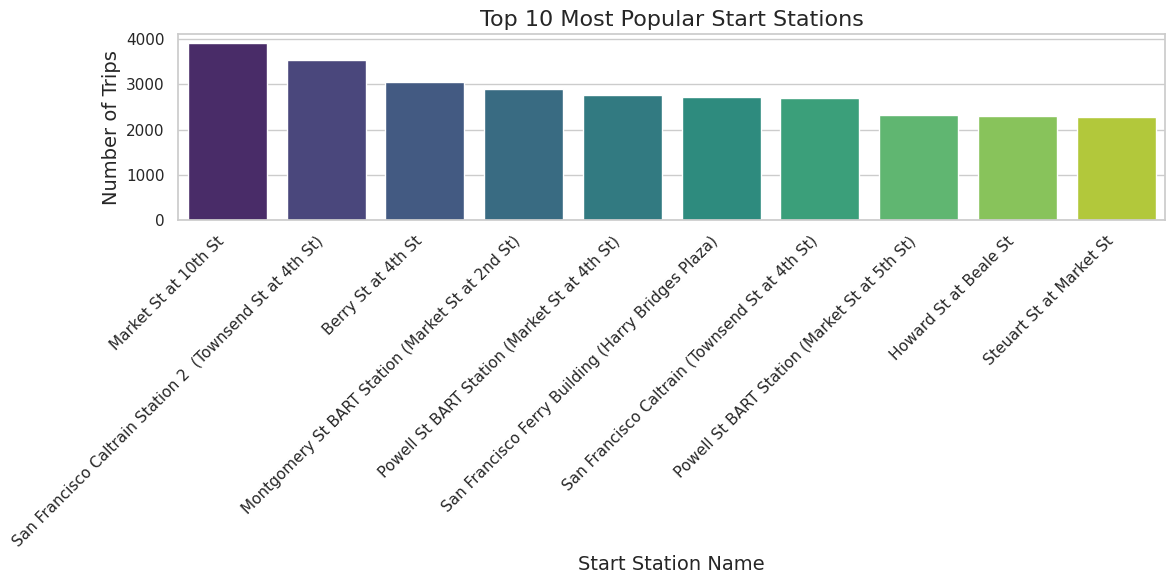

In [4]:
# Group the data by 'start_station_name' and count the number of trips for each station
station_counts = data['start_station_name'].value_counts().head(10)

# Create a bar plot of the top 10 most popular start stations
plt.figure(figsize=(12, 6))
sns.barplot(x=station_counts.index, y=station_counts.values, palette='viridis')

# Add title and labels
plt.title('Top 10 Most Popular Start Stations', fontsize=16)
plt.xlabel('Start Station Name', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


## Visualization 3: User Gender Distribution

This visualization will provide a breakdown of bike usage by user gender.
- Purpose: This pie chart visualizes the gender distribution among users of the Ford GoBike system.
- Observation: The majority of users are male, with a smaller percentage of female users. Understanding the gender distribution can help tailor marketing campaigns or consider any potential gender-based trends in bike usage.
- Design: The chart uses distinct colors for each gender and presents percentages to easily compare the proportions. The start angle of 90 degrees helps position the largest segment at the top for clarity.

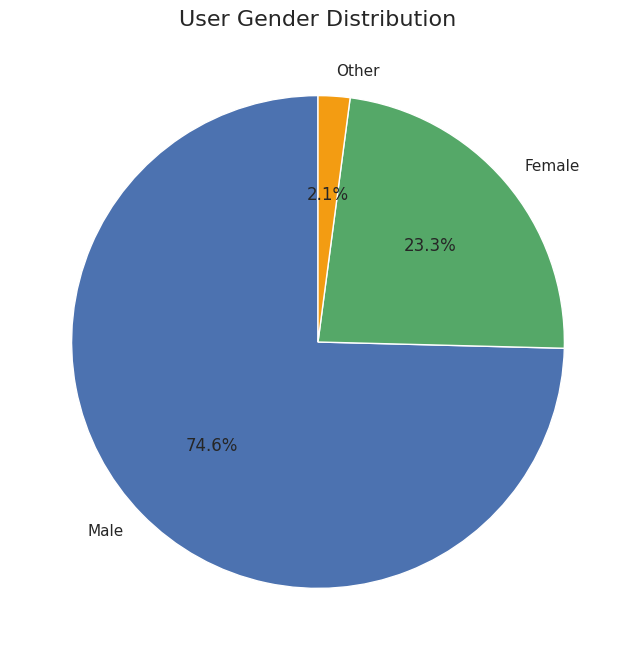

In [5]:
# Count the number of occurrences of each gender in the 'member_gender' column
gender_counts = data['member_gender'].value_counts()

# Create a pie chart to visualize the gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#4C72B0', '#55A868', '#F39C12'])
plt.title('User Gender Distribution', fontsize=16)

# Display the plot
plt.show()
